## Tutorial: How to perform a calculation with PCM (polarizable continuum model)

In this tutorial we study how to calculate a (104) LiCoO2 surface energy in a contact with an implicit electrolyte.

The model supercell of (104) LiCoO2 with vacuum was constructed earlier.
Implicit electrolyte will be applied using the VASPsol package implemented into VASP.


The link to the VASPsol github page: https://github.com/henniggroup/VASPsol
See also information at our webpage: https://wiki.storion.ru/tut/pcm

In [1]:
# Import SIMAN libraries and read configuration files
from siman.header import _update_configuration, db #DFT manager https://github.com/dimonaks/siman
from siman.calc_manage import smart_structure_read, add, res
from siman.set_functions import read_vasp_sets
from siman.database import read_database
# Import SIMAN function for surface energy calculation
from siman.analysis import suf_en

_update_configuration('simanrc.py') # read main configuration file
read_database() # read saved calculations and sets from database files calc.gdbm and only_calc.gdbm
import project_sets # should be after read_database
varset = read_vasp_sets(project_sets.user_vasp_sets, override_global = 0) #read user sets from file project_sets.py

For calculations of LiCoO2 system magnetic sets with Hubbard correction will be used:

-'um_opt' - for bulk supercells

-'um_opt_suf' - for supercells with vacuum layer added in z-direction

In [38]:
print('um_opt')
varset['um_opt'].printme()
print('\n\num_opt_suf')
varset['um_opt_suf'].printme()

um_opt
-- s.params['ISTART']             = 1  
-- s.params['NELM']               = 20  
-- s.params['EDIFF']              = 1e-05  
-- s.params['NSW']                = 50  
-- s.params['ENCUT']              = 400  
-- s.params['ENAUG']              = 700.0  
-- s.params['KSPACING']           = 0.2  
-- s.params['LREAL']              = Auto  
-- s.params['ISMEAR']             = 0  
-- s.params['mul_nbands_small_cell'] = 3  
-- s.params['IBRION']             = 1  
-- s.params['ISIF']               = 2  
-- s.params['EDIFFG']             = -0.05  
-- s.params['POTIM']              = 0.2  
-- s.params['ICHARG']             = 1  
-- s.params['LORBIT']             = 11  
-- s.params['ISPIN']              = 2  
-- s.params['GGA_COMPAT']         = .FALSE.  
-- s.params['LDAU']               = .TRUE.  
-- s.params['LDAUTYPE']           = 2  
-- s.params['LDAUL']              = {'Ti': 2, 'Co': 2, 'Fe': 2, 'Ni': 2, 'Mn': 2, 'V': 2, 'Cr': 2}  
-- s.params['LDAUU']              = {'Ti': 0, 'Co': 3.

### Read bulk and (104) LCO slab structures

In [13]:
st_bulk = smart_structure_read('LCO_bulk.POSCAR')
st_bulk.printme()

Full Formula (Li1 Co1 O2)
Reduced Formula: LiCoO2
abc   :   2.838024   2.838024   4.997070
angles:  73.502780  73.502780  59.999998
pbc   :       True       True       True
Sites (4)
  #  SP          a         b         c
---  ----  -------  --------  --------
  0  Co    0.5      0.5       0.500001
  1  Li    1        1         1e-06
  2  O     0.76038  0.76038   0.718462
  3  O     0.23962  0.239621  0.281537


In [14]:
st_slab104 = smart_structure_read('LCO_104_slab.POSCAR')
st_slab104.printme()

Full Formula (Li5 Co5 O10)
Reduced Formula: LiCoO2
abc   :   2.840185   5.751121  26.323837
angles:  92.135098  93.092427  90.000003
pbc   :       True       True       True
Sites (20)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  Co    0.753873  0.599856  0.965689
  1  Co    0.214888  0.836831  0.887719
  2  Co    0.676492  0.067218  0.810927
  3  Co    0.138096  0.297605  0.734136
  4  Co    0.599111  0.534579  0.656166
  5  Li    0.753526  0.116074  0.964996
  6  Li    0.214608  0.340413  0.887159
  7  Li    0.676492  0.567218  0.810927
  8  Li    0.138377  0.794022  0.734696
  9  Li    0.599458  0.018362  0.656859
 10  O     0.256779  0.38328   0.971501
 11  O     0.252413  0.829857  0.962769
 12  O     0.714996  0.610855  0.887935
 13  O     0.713579  0.066787  0.885101
 14  O     0.17838   0.842012  0.814703
 15  O     0.174604  0.292423  0.807152
 16  O     0.639405  0.067649  0.736754
 17  O     0.637988  0.52358   0.73392
 18  O     0.100

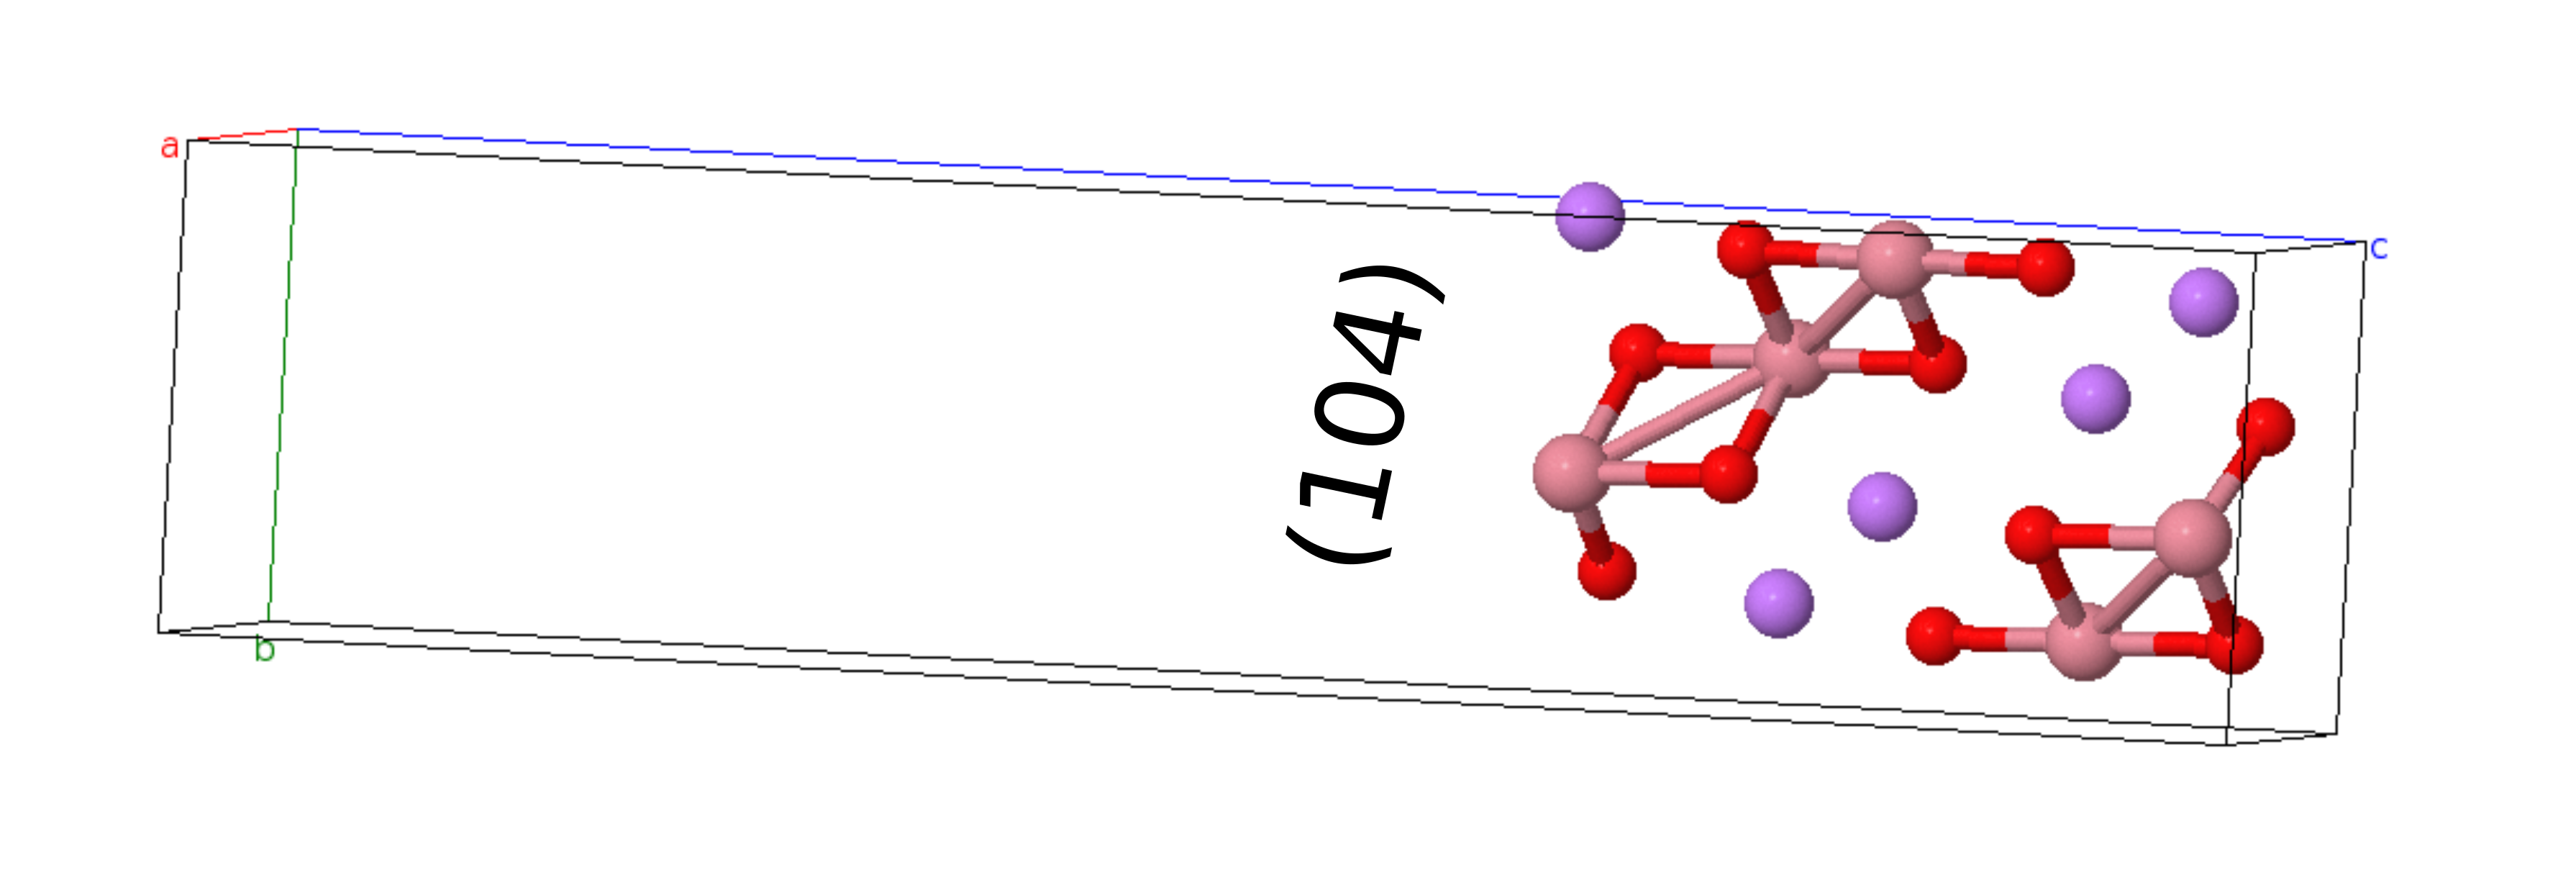

In [15]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
Image(filename='figs/slab.png', width=500,  embed=True) 

### Perform a calculation with our usual sets for similar systems

In [6]:
add('LCO.bulk', 'um_opt', 1, input_st = st_bulk, it_folder = 'LCO', run=1, cluster = 'cee');

-- Warning! This calculation was already submitted. Use run = 2 to submit it again 

-- Warning! run = 2, the calculation is resubmitted 

-- check_kpoints(): Kpoint   mesh is:  [13, 13, 7] 

-- check_kpoints(): The actual k-spacings are  ['0.20', '0.20', '0.19'] 

-- POSCAR was written to LCO//LCO.bulk.um_opt/1.POSCAR 

-- Attention! ngkpt =  [13, 13, 7]  is adopted from struct_des which you provided for it  LCO.bulk  and kspacing =  0.2 


Calculation db[('LCO.bulk', 'um_opt', 1)] successfully created

 

JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
            214808  AMG-long  EC_freq d.govoro PD       0:00      1 (QOSGrpCpuLimit)
            214809  AMG-long   EC_adz d.govoro PD       0:00      1 (QOSGrpCpuLimit)
            214810  AMG-long   EC_atz d.govoro PD       0:00      1 (QOSGrpCpuLimit)
            214793  AMG-long      EC+ d.govoro  R   14:25:14      1 node-amg10
            214794  AMG-long      EC- d.govoro  R    5:34:17      1 node-amg09
  

'LCO.bulk'

In [45]:
add('LCO.104', 'um_opt_suf', 1, input_st = st_slab104, it_folder = 'LCO', run=2, cluster = 'cee', ngkpt = (11,5,1));

-- add_loop(), you provided *ngkpt*, I add (11, 5, 1) to description of LCO.104 for kspacing 0.2 

-- check_kpoints(): Kpoint   mesh is:  (11, 5, 1) 

-- check_kpoints(): The actual k-spacings are  ['0.20', '0.22', '0.24'] 

-- POSCAR was written to LCO//LCO.104.um_opt_suf/1.POSCAR 

-- Attention! ngkpt =  (11, 5, 1)  is adopted from struct_des which you provided for it  LCO.104  and kspacing =  0.2 


Calculation db[('LCO.104', 'um_opt_suf', 1)] successfully created

 

JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
            214808  AMG-long  EC_freq d.govoro PD       0:00      1 (QOSGrpCpuLimit)
            214809  AMG-long   EC_adz d.govoro PD       0:00      1 (QOSGrpCpuLimit)
            214810  AMG-long   EC_atz d.govoro PD       0:00      1 (QOSGrpCpuLimit)
            214793  AMG-long      EC+ d.govoro  R 1-01:28:11      1 node-amg10
            214794  AMG-long      EC- d.govoro  R   16:37:14      1 node-amg09
            214835 AMG-mediu C98sw_57 m

'LCO.104'

In [16]:
#read results
db['LCO.bulk', 'um_opt', 1].res()
db['LCO.104',  'um_opt_suf', 1].res()

The following TM are found: [27, 8]

 Znucl:   27
  0.00 

 Znucl:   8
 -0.00  -0.00 


--                           |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    


Max. F. tot  (meV/A) =  [54 35] 

-- db['LCO.bulk.um_opt.1']       |  -22.9160  |2.84, 2.84, 5.00| -6119,-5821,-5994  |   2, 8, 16    

Database has been successfully updated

The following TM are found: [27, 8]

 Znucl:   27
  1.92  -0.01   0.01  -0.01   1.92 

 Znucl:   8
 -0.03  -0.05   0.12  -0.00   0.01   0.01  -0.00   0.12  -0.05  -0.03 


--                           |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    


Max. F. tot  (meV/A) =  [427 193 135  53  30] 

-- db['LCO.104.um_opt_suf.1']    | -112.9640  |2.84, 5.75, 26.32| -4325,-3499,-2562  |   5,12, 62    

Database has been successfully updated



### Surface energy calculation

In [19]:
#Input parameters for suf_en function are 'slab' Calculation() object and 'bulk' Calculation object
LC = db['LCO.bulk', 'um_opt', 1]
LC104 = db['LCO.104', 'um_opt_suf', 1]
suf_en(LC104, LC);


Surface area is 16.33 A^2, please check
Number of bulk cells in slab is 5
Surface energy = 0.79 J/m2   | ('LCO.104', 'um_opt_suf', 1) | ('LCO.bulk', 'um_opt', 1) 


The lowest energy (104) LCO surface with energy of ~0.8 J/m2 has intermediate spin (IS) Co atoms at surface (magnetic moment 1.9 mu_B):

**1.92**  -0.01   0.01  -0.01   **1.92**

see 10.1103/PhysRevMaterials.8.055403

### The first step of PCM calculation

Since PCM calculation requires more accurate parameters (ENCUT >= 600 eV) and the usage of full electronic PAW potentials for the light elements, we shoud recalculate our bulk and slab supercells with new sets based on 'um_opt' and 'um_opt_suf'.

These sets features:

1) NELM = 400 #for better convergence
2) LWAVE = True #to save wavecar, which will be used in the second step of PCM calculation

Our new sets are 'pcm_bulk' and 'pcm_suf'

In [20]:
print('pcm_bulk')
varset['pcm_bulk'].printme()
print('\n\npcm_suf')
varset['pcm_suf'].printme()

pcm_bulk
-- s.params['ISTART']             = 1  
-- s.params['NELM']               = 400  
-- s.params['EDIFF']              = 1e-06  
-- s.params['NSW']                = 50  
-- s.params['PREC']               = Accurate  
-- s.params['ENCUT']              = 600  
-- s.params['ENAUG']              = 700.0  
-- s.params['KSPACING']           = 0.2  
-- s.params['LREAL']              = Auto  
-- s.params['ISMEAR']             = 0  
-- s.params['mul_nbands_small_cell'] = 3  
-- s.params['IBRION']             = 1  
-- s.params['ISIF']               = 2  
-- s.params['EDIFFG']             = -0.05  
-- s.params['POTIM']              = 0.2  
-- s.params['ICHARG']             = 1  
-- s.params['LORBIT']             = 11  
-- s.params['ISPIN']              = 2  
-- s.params['GGA_COMPAT']         = .FALSE.  
-- s.params['LDAU']               = .TRUE.  
-- s.params['LDAUTYPE']           = 2  
-- s.params['LDAUL']              = {'Ti': 2, 'Co': 2, 'Fe': 2, 'Ni': 2, 'Mn': 2, 'V': 2, 'Cr': 2}  
-- s

In [24]:
LC = db['LCO.bulk', 'um_opt', 1] #give a short name for the bulk Calculation() object


#first way how to perform calculation: use the method cl.run('new_set')
LC.run('pcm_bulk', run =1, cluster = 'cee');

#second way how to perform calculation: use the method cl.run('new_set') and occupation matrix control 
occfile = LC.write_occmatrix() #occfile includes occupation matrices inherited from LC
#we put the matrices to fix them in our new calculation. We use another cluster with VASP compiled with OMC patch
#https://github.com/WatsonGroupTCD/Occupation-matrix-control-in-VASP

# params = {'update_set_dic':{'OCCEXT':1} - allows to update the dictionary with the set. 
# We should append 'OCCEXT = 1' parameter to turn on the OMC mode

LC.run('pcm_bulk', run =1, cluster = 'cee-omc', it_suffix = 'occ', it_suffix_del = 0, params = {'update_set_dic':{'OCCEXT':1}, 'occmatrix':occfile});

-- Warning! File .//LCO/LCO.bulk.ifn/LCO.bulk.ifn.inherit.full_nomag.1.geo was replaced 

-- File xyz/LCO.bulk.um_opt.1.end.xyz was written 

-- inherit_ngkpt(): the k-grid from LCO.bulk was inherited to LCO.bulk.ifn 

-- Warning! This calculation was already submitted. Use run = 2 to submit it again 

-- Bye-bye! 

JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
            214846  AMG-long      EC+ d.govoro  R 4-10:32:12      1 node-amg01
            214979 AMG-mediu inter.ba  a.burov  R    6:38:35      1 node-amg05
            214993 AMG-mediu LLZO_tet  a.burov  R    4:18:09      1 node-amg06
            214969 AMG-mediu surf_104  a.burov  R   10:18:32      1 node-amg03
            214985 AMG-mediu LC104.DM   a.boev  R    8:19:57      1 node-amg12
            214984 AMG-mediu LC104.DM   a.boev  R    8:20:22      1 node-amg11
            214983 AMG-mediu LC104.DM   a.boev  R    8:20:50      1 node-amg10
            214982 AMG-mediu LC104.DM   a.boev  R    8:21

In [27]:
# Do the same operation for our slab

LC104 = db['LCO.104', 'um_opt_suf', 1]


#first way
LC104.run('pcm_suf', run =1,add=1,cluster = 'cee',ngkpt = (11,5,1));

#second way
occfile = LC104.write_occmatrix()
LC104.run('pcm_suf', run =1,add=1, ngkpt = (11,5,1), cluster = 'cee-omc', it_suffix = 'occ', it_suffix_del = 0, params = {'update_set_dic':{'OCCEXT':1}, 'occmatrix':occfile});


-- Warning! File .//LCO/LCO.104.ifn/LCO.104.ifn.inherit.full_nomag.1.geo was replaced 

-- File xyz/LCO.104.um_opt_suf.1.end.xyz was written 

-- inherit_ngkpt(): the k-grid from LCO.104 was inherited to LCO.104.ifn 

-- add_loop(), you provided *ngkpt*, I add (11, 5, 1) to description of LCO.104.ifn for kspacing 0.2 

-- Warning! This calculation was already submitted. Use run = 2 to submit it again 

-- Bye-bye! 

JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
            214846  AMG-long      EC+ d.govoro  R 4-10:35:17      1 node-amg01
            214979 AMG-mediu inter.ba  a.burov  R    6:41:40      1 node-amg05
            214993 AMG-mediu LLZO_tet  a.burov  R    4:21:14      1 node-amg06
            214969 AMG-mediu surf_104  a.burov  R   10:21:37      1 node-amg03
            214985 AMG-mediu LC104.DM   a.boev  R    8:23:02      1 node-amg12
            214984 AMG-mediu LC104.DM   a.boev  R    8:23:27      1 node-amg11
            214983 AMG-mediu LC104

### Reading results of the first step

In [28]:
# bulk
LC_sv = db['LCO.bulk.ifn.pcm_bulk.1']
LC_sv.res()
LC_sv_omc = db['LCO.bulk.ifn.occ.pcm_bulk.1']
LC_sv_omc.res()

#slab
LC104_sv = db[('LCO.104.ifn', 'pcm_suf', 1)]
LC104_sv.res()
LC104_sv_omc = db[('LCO.104.ifn.occ', 'pcm_suf', 1)]
LC104_sv_omc.res()

The following TM are found: [27, 8]

 Znucl:   27
 -0.00 

 Znucl:   8
 -0.00  -0.00 


--                           |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    


Max. F. tot  (meV/A) =  [43] 

-- db['LCO.bulk.ifn.pcm_bulk.1'] |  -22.8849  |2.84, 2.84, 5.00|  -866,-800,-682    |   1,15, 15    

Database has been successfully updated

The following TM are found: [27, 8]

 Znucl:   27
  0.00 

 Znucl:   8
 -0.00  -0.00 


--                           |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    


Max. F. tot  (meV/A) =  [44] 

-- db['LCO.bulk.ifn.occ.pcm_bulk.1']|  -22.8844  |2.84, 2.84, 5.00|  -965,-898,-804    |   1,23, 23    

Database has been successfully updated

-- Attention!, SCF was not converged to desirable prec 0.001 > 0.001 meV 

The following TM are found: [27, 8]

 Znucl:   27
  0.96  -0.01   0.01  -0.01   0.96 

 Znucl:   8
  0.01  -0.02  -0.03   0.00  -0.00  -0.00   0.00  -0.03  -0.02   0.01 


--        

In [30]:
#first way
suf_en(LC104_sv,LC_sv);
#second way
suf_en(LC104_sv_omc,LC_sv_omc);

Surface area is 16.33 A^2, please check
Number of bulk cells in slab is 5
Surface energy = 1.41 J/m2   | ('LCO.104.ifn', 'pcm_suf', 1) | ('LCO.bulk.ifn', 'pcm_bulk', 1) 
Surface area is 16.33 A^2, please check
Number of bulk cells in slab is 5
Surface energy = 0.79 J/m2   | ('LCO.104.ifn.occ', 'pcm_suf', 1) | ('LCO.bulk.ifn.occ', 'pcm_bulk', 1) 


We can see, that the first way calculated slab has wrong states of surface Co atoms:

**0.96**  -0.01   0.01  -0.01   **0.96**

Due to this, the surface energy is increased: 1.41 J/m2

In [35]:
tb1 = LC_sv.time
tb2 = LC_sv_omc.time
print(f'Time without OMC is {tb1} s')
print(f'Time with OMC is {tb2} s')
#The bulk calculation of small cell (4 atoms) with OMC is 25% longer than one without OMC

t1 = LC104_sv.time
t2 = LC104_sv_omc.time

print(f'Time without OMC is {t1} s')
print(f'Time with OMC is {t2} s')
#However the slab calculation with OMC is 10 times faster

Time without OMC is 333.499 s
Time with OMC is 435.315 s
Time without OMC is 7238.076 s
Time with OMC is 781.701 s


### The second step of PCM calculation

PCM calculation should be performed only for slab.

Note! VASP should be compiled with VASPsol patch https://github.com/henniggroup/VASPsol

The set for a calculation with applied PCM is inherited from 'pcm_slab' with some changes:

1) NSW = None #it is a single-point calculation
2) LSOL = True # to turn on the PCM mode
3) EB_K = dielectric constant of interesting solvent #the key parametr describing the solvent
4) ISTART = 1 #to read wavecar from the first step calculation

In [6]:
LC104_sv_omc.run('pcm_suf_ec', iopt = 'full_wave', cluster = 'cee-pcm',  run=1);

-- Directory .//LCO/LCO.104.ifn.occ.ifw  was created 

-- File xyz/LCO.104.ifn.occ.pcm_suf.1.end.xyz was written 

-- inherit_ngkpt(): the k-grid from LCO.104.ifn.occ was inherited to LCO.104.ifn.occ.ifw 

-- actualize_set(): Magnetic moments are determined from self.init.magmom: [1.919, -0.012, 0.007, -0.012, 1.919, -0.0, -0.0, 0.003, -0.0, -0.0, -0.03, -0.054, 0.119, -0.002, 0.005, 0.005, -0.002, 0.119, -0.054, -0.03] 

-- check_kpoints(): Kpoint   mesh is:  (11, 5, 1) 

-- check_kpoints(): The actual k-spacings are  ['0.20', '0.22', '0.24'] 

-- POSCAR was written to LCO//LCO.104.ifn.occ.ifw.pcm_suf_ec/1.POSCAR 

-- Attention! ngkpt =  (11, 5, 1)  is adopted from struct_des which you provided for it  LCO.104.ifn.occ.ifw  and kspacing =  0.2 


Calculation db[('LCO.104.ifn.occ.ifw', 'pcm_suf_ec', 1)] successfully created

 

-- Copying WAVECAR ... 

-- File 1.WAVECAR was succesfully copied to /home/a.boev//LCO//LCO.104.ifn.occ.ifw.pcm_suf_ec// with new name WAVECAR 

JOBID PARTITION 

In [36]:
LC104_ec = db['LCO.104.ifn.occ.ifw', 'pcm_suf_ec', 1]
LC104_ec.res()

The following TM are found: [27, 8]

 Znucl:   27
  1.91  -0.01   0.01  -0.01   1.91 

 Znucl:   8
 -0.03  -0.05   0.12  -0.00   0.01   0.01  -0.00   0.12  -0.05  -0.03 


--                           |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    


Max. F. tot  (meV/A) =  [370] 

-- db['LCO.104.ifn.occ.ifw.pcm_suf_ec.1']| -113.4445  |2.84, 5.75, 26.32|  -2147,-487,-369   |   1,42, 42    

Database has been successfully updated



In [37]:
suf_en(LC104_ec,LC_sv_omc);

Surface area is 16.33 A^2, please check
Number of bulk cells in slab is 5
Surface energy = 0.48 J/m2   | ('LCO.104.ifn.occ.ifw', 'pcm_suf_ec', 1) | ('LCO.bulk.ifn.occ', 'pcm_bulk', 1) 


#### Finally obtained (104) surface energy in a contact with implicit EC is 0.48 J/m2 (vs 0.79 J/m2 in a contact with vacuum)